## Computational Guided Inquiry for Polar Research  

## Heat flux through permafrost

### Activity overview  
1. Learn how permafrost changes over the course of an annual cycle 
2. Plot observed temperature profiles of permafrost
3. Develop skill in analyzing heat flow through a permafrost layer, using a numerical derivative technique.

### Pre-class activities

1. Read the Introduction.  
2. Check out the animation _Permafrost – what is it?_ described in the Introduction. 
3. Define the terms _permafrost_, _thermal diffusivity_, _thermal conductivity_, _specific heat capacity_, and _volume heat capacity_.

### Introduction

What is permafrost? Scientists at the National Snow and Ice Data Center, https://nsidc.org/,  provide the following definition:

_Permafrost, or permanently frozen ground, is ground (soil, sediment, or rock) that remains at or below 0°C for at least two years (Permafrost Subcommittee, 1988). It occurs both on land and beneath offshore arctic continental shelves, and underlies about 22 percent of the Earth's land surface._  

The Alfred Wegener Institute in Europe has also been very active in permafrost research. They have put together a useful animation, titled _Permafrost – what is it?_ (https://www.awi.de/en/focus/permafrost.html) that you should watch in preparation for the in-class activities in this exercise.

Now for some theory associated with heat flow. All substances have properties that control how easily heat flows into and out of them. An important one is the substance's _thermal diffusivity_, denoted  

$D_h$ ($m^2/s$).  

The _thermal conductivity_ is denoted  

$K_h$ ($ J \space m^{-1}s^{-1} K^{-1} $).  

The _specific heat capacity_ is denoted  

$c_h$ ($ J \space kg^{-1} K^{-1} $).  

From the specific heat capacity, we can obtain the _volume heat capacity_ by  

$C_h = \rho c_h$  

where $\rho$ is the density ($kg \space m^{-1}$) of a substance. This means $C_h$ can be expressed as the ratio $C_h = K_h/D_h$ ($J \space m^{-3} K^{-1}$)



How are these quantities useful for permafrost? Suppose we know the temperature profile, $T(z)$, of a layer of permafrost. Here, we're using the convention that $z$ indicates depth, starting at the surface. It turns out that the vertical heat flux through that layer is given by 

$j_h = -K_h \frac{\partial T}{\partial z}$

where a positive value of $j_h$ would mean heat moving _down into the ground_ (and a negative value means heat moving _up toward the surface_. 

In this activity, you'll obtain a temperature profile and calculate the vertical heat flux through it.

### Part 1. Examining temperature profiles of permafrost

The Bayelva catchment in the Svalbard archipelago, located at ∼79°N, 12°E, has been the subject of a great many studies on permafrost. An image showing the temperature structure of a permafrost layer, spanning the years 1998-2000, has been saved as a .png file. In the next cell you'll load and display this image. 

Reference for this figure:
http://www.iup.uni-heidelberg.de/institut/forschung/groups/ts/soil_physics/students/permafrost/permafrost-2.pdf

In [18]:
# First we have to get some resources
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib notebook

<IPython.core.display.Javascript object>


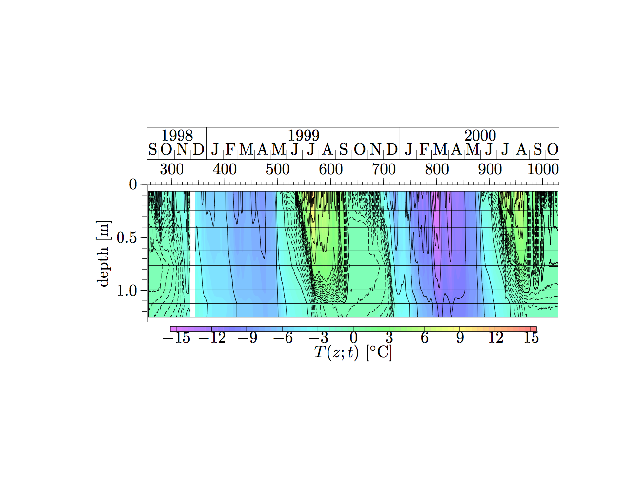

(-0.5, 1015.5, 502.5, -0.5)

In [19]:
# Now, load and display a temperature profile
img=mpimg.imread('temperature profiles of permafrost.png')
plt.figure()
imgplot = plt.imshow(img)
plt.axis('off')

### Pause for analysis
Approximately how cold does it get at the surface? How warm? What appear to be the the coldest and warmest months of the year? Does temperature appear to be more variable at the surface, or at 1 meter deep? What do you suppose is responsible for this difference?

### Part 2. Temperature profiles over time

Next we'll extract some data from the above temperature profiles, but only for two specific times. These are contained in text files, with the first column the depth, the second column the temperature.

In [20]:
# Load the T1 temperature profile
profile = np.loadtxt('T1.txt')
z = profile[:,0]
T1 = profile[:,1]

In [21]:
# Load the T2 temperature profile
profile = np.loadtxt('T2.txt')
z = profile[:,0]
T2 = profile[:,1]

<IPython.core.display.Javascript object>


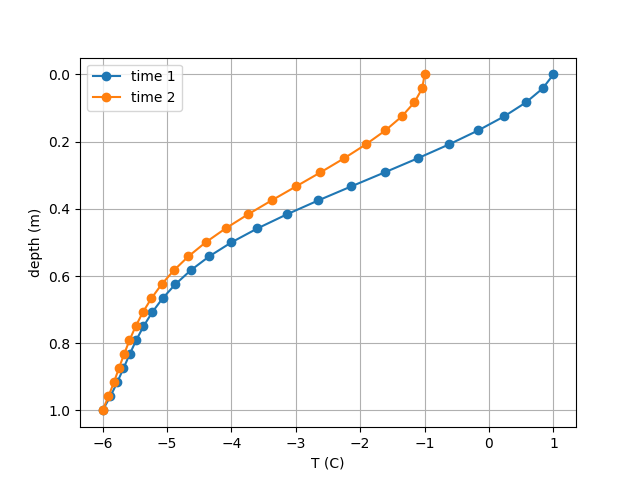

In [22]:
# Graph them
plt.figure()

# Graph T1
plt.plot(T1,z,'-o',label='time 1')

# Graph T2
plt.plot(T2,z,'-o',label='time 2')

# Dress up the display a little
plt.xlabel('T (C)')
plt.ylabel('depth (m)')
plt.grid('on')
plt.legend()
plt.gca().invert_yaxis()

### Pause for analysis
Is the ground warming up or cooling down? Given this trend, what time of year do these profiles probably correspond to?

### Part 3. Learning how to take a numerical derivative

Our eventual goal is to examine the heat flux through our layer of permafrost. The relevant equation is given in the Introduction. Before doing so, however, you'll need to develop some skill at taking numerical deriviatives. Python's numpy package has a few handy functions for this. One is called "linspace", which allows one to generate a sequence of equally-spaced numbers. Another is called "diff", that allows you to find the differences between numbers in a sequence. In the next few cells you'll learn how to use these functions to take a numerical derivative.

In [23]:
# Make up a sequence of five numbers
x = np.linspace(0,1,5)
print x

[ 0.    0.25  0.5   0.75  1.  ]


### Try your skill
The numbers in parentheses in the cell above specify the range and number of points. Repeat it in the cell below, but with nine numbers instead of five.

In [24]:
# Make up a sequence of nine numbers
x = np.linspace(0,1,9)
print x

[ 0.     0.125  0.25   0.375  0.5    0.625  0.75   0.875  1.   ]


OK, the next task is to take the difference between these numbers. That's done with diff, as you can see below.

In [25]:
dx = np.diff(x)
print dx

[ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]


Did you see what happened? You can see that the result has one less value than you started with (of course). 

You can do the same with any array of numbers. Say, for example, you were interested in a function $f(x)=x^2$. First, calculate $f(x)$ for your series of x-values, and graph it.

[ 0.        0.015625  0.0625    0.140625  0.25      0.390625  0.5625
  0.765625  1.      ]


<IPython.core.display.Javascript object>


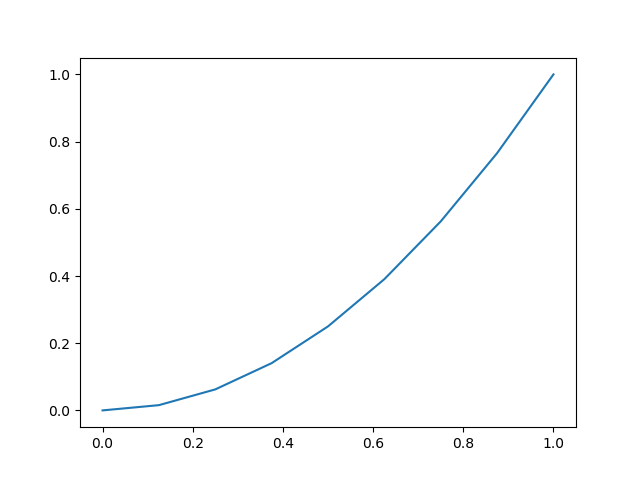

In [26]:
# Calculate f(x)
f = x**2
print f

# Graph it
plt.figure()
plt.plot(x,f)

Now, calculate df

In [27]:
# Calculate df
df = np.diff(f)
print df

[ 0.015625  0.046875  0.078125  0.109375  0.140625  0.171875  0.203125
  0.234375]


To calculate the derivative is easy: you just divide df by dx 

In [28]:
dfdx = df/dx
print dfdx

[ 0.125  0.375  0.625  0.875  1.125  1.375  1.625  1.875]


We're almost done with this tutorial. A slight twist comes when you want to graph df/dx. Because both df and dx are one shorter than the original f and x, you need to shorten the x-array too. You can do this with the following command:

In [29]:
# Get a shortened x-array
x_short = x[0:-1]
print x_short

[ 0.     0.125  0.25   0.375  0.5    0.625  0.75   0.875]


OK, now you're ready to graph df/dx as a function of x!

<IPython.core.display.Javascript object>


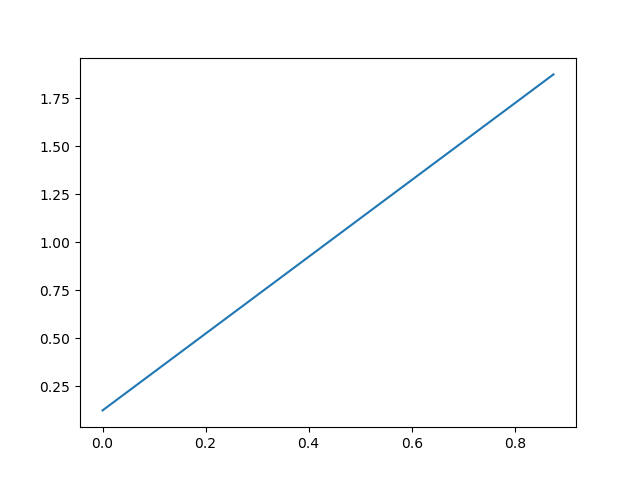

In [30]:
# Graph dfdx
plt.figure()
plt.plot(x_short,dfdx)

### Pause for analysis
Does this graph make sense to you? Using your knowledge of calculus, obtain an analytical expression for df/dx, and compare it to the graph above.

### Part 4. Analyzing heat flow through a permafrost layer

Next we'll examine how heat flows through our layers. We'll need some parameters for permafrost first.

In [31]:
# Parameters of the permafrost we need for analysis
Dh = 8e-7 # m^2/s
print Dh, 'Thermal diffusivity, m^2/s'
Kh = 1.0 # J/m/s/K
print Kh, 'Thermal conductivity, J/m/s/K'
Ch = Kh/Dh # J/m^3/K
print Ch, 'Heat capacity, J/m^3/K'
ch = 2e3 # J/kg/K
rho = Ch/ch # kg/m^3
print rho, 'Soil density consistent from these parameters, kg/m^3'

8e-07 Thermal diffusivity, m^2/s
1.0 Thermal conductivity, J/m/s/K
1250000.0 Heat capacity, J/m^3/K
625.0 Soil density consistent from these parameters, kg/m^3


It's useful to convert the density into a more familiar unit, $g/cm^3$, since we know that the density of pure water has a density of $1 g/cm^3$, so the density of permafrost should be a little less. Print the density of our soil as $g/cm^3$. 

In [32]:
# Printing the soil density in g/cm^3 
print rho/1e3

0.625


Now you're ready to calculate and graph the vertical heat flux, $j_h$, associated with the T1 temperature profile. The relevant equation is in the introduction. 

<IPython.core.display.Javascript object>


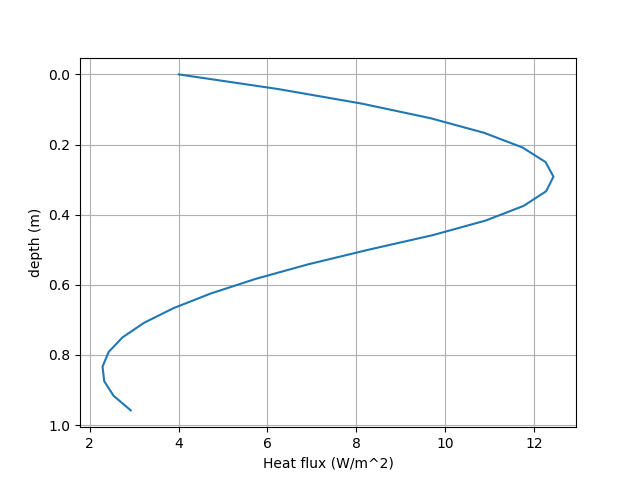

In [33]:
# Vertical heat flux
jh = -Kh*np.diff(T1)/np.diff(z)

# Graphing. 
plt.figure()
plt.plot(jh,z[:-1],label='jh1')
plt.xlabel('Heat flux (W/m^2)')
plt.ylabel('depth (m)')
plt.gca().invert_yaxis()
plt.grid('on')

### Try your skill 

Do the same for the T2 temperature profile

<IPython.core.display.Javascript object>


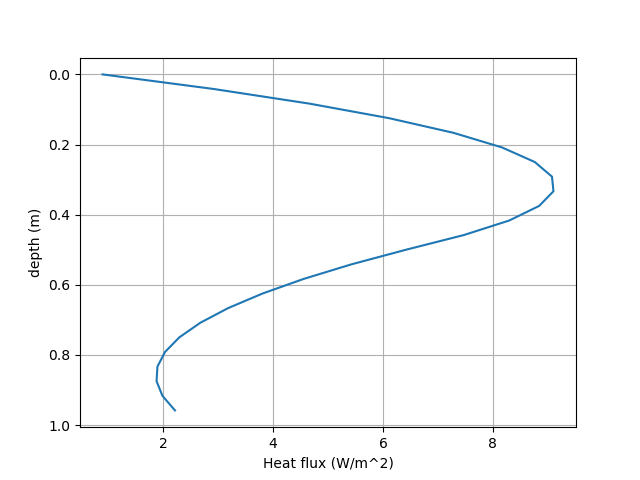

In [34]:
# Vertical heat flux
jh = -Kh*np.diff(T2)/np.diff(z)

# Graphing. 
plt.figure()
plt.plot(jh,z[:-1],label='jh1')
plt.xlabel('Heat flux (W/m^2)')
plt.ylabel('depth (m)')
plt.gca().invert_yaxis()
plt.grid('on')

### Pause for analysis
Is heat flowing up through the surface, or down into it? At what depth is the heat flux the greatest? Which profile (T1 or T2) has the greater heat flux. Can you explain why based on the profiles themselves?